![imagen](../img/img3.png)
# Proyecto Machine Learning
- # Bank Customer Churn Detection
- ## **Modelos Machine Learning:** "Churn_processed.csv"

# 1. Librerías necesarias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

import pickle
import yaml

# 2. Leemos el Dataset Final de "Train_churn_processed.csv"

In [2]:
df_train = pd.read_csv("../data_processed/Train_Churn_processed.csv")
df_train.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
0,0,1,2,0.00,0,1,1,101348.88,2,0,464,2,2,1
1,1,1,1,83807.86,0,0,1,112542.58,3,0,456,2,2,0
2,0,1,8,159660.80,1,1,0,113931.57,3,0,377,2,1,1
3,0,1,1,0.00,0,0,0,93826.63,5,1,350,2,3,0
4,1,1,2,125510.82,0,1,1,79084.10,5,1,425,2,4,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geography             8000 non-null   int64  
 1   Gender                8000 non-null   int64  
 2   Tenure                8000 non-null   int64  
 3   Balance               8000 non-null   float64
 4   NumOfProducts         8000 non-null   int64  
 5   HasCrCard             8000 non-null   int64  
 6   IsActiveMember        8000 non-null   int64  
 7   EstimatedSalary       8000 non-null   float64
 8   Satisfaction Score    8000 non-null   int64  
 9   Card Type             8000 non-null   int64  
 10  Point Earned          8000 non-null   int64  
 11  Age Category          8000 non-null   int64  
 12  CreditScore Category  8000 non-null   int64  
 13  Exited                8000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 875.1 KB


# 3. Separamos **Train** en X e y . Además, lo dividimos en train y test:

## 3.1. X e y de Train

- "X" Estará formada por las **features** : 'Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Age Category', 'CreditScore Category'.
- "y" será nuestra target: `Exited`

In [4]:
X = df_train.drop(columns=["Exited"])
y = df_train["Exited"]

## 3.2. Division de Train en: X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (8000, 13)
Train features shape: (6400, 13)
Train target shape: (6400,)
Test features shape: (1600, 13)
Test target shape: (1600,)


# 4. Desbalance del Traget `Exited`

## 4.1. Visualizamos la situación del desbalance

In [6]:
print("Distribución del Target en y:\n", y.value_counts())
print("-"*35)
print("Distribución del Target en y_train:\n", y_train.value_counts())
print("-"*35)
print("Distribución del Target en y_test:\n", y_test.value_counts())

Distribución del Target en y:
 Exited
0    6353
1    1647
Name: count, dtype: int64
-----------------------------------
Distribución del Target en y_train:
 Exited
0    5067
1    1333
Name: count, dtype: int64
-----------------------------------
Distribución del Target en y_test:
 Exited
0    1286
1     314
Name: count, dtype: int64


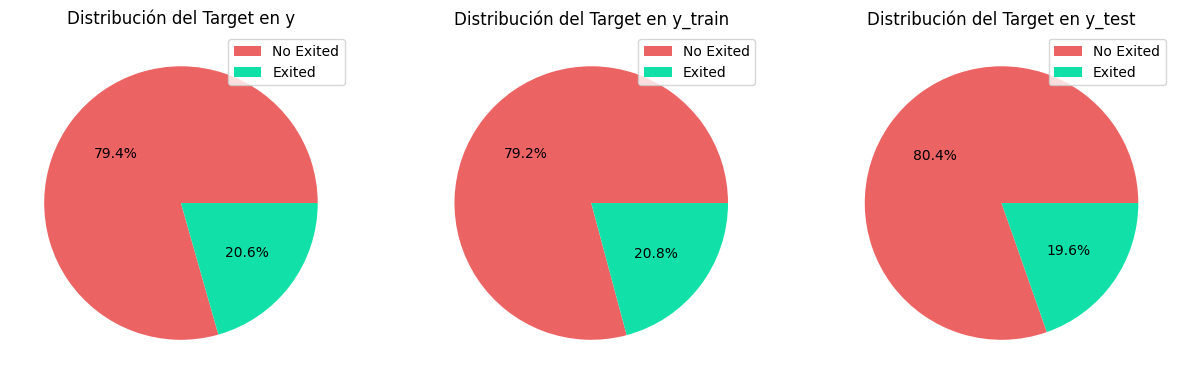

In [7]:
colores = ['#ec6363', '#11e1a8']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(y.value_counts(), autopct='%1.1f%%', colors=colores)
axes[0].set_title('Distribución del Target en y')
axes[0].legend(['No Exited', 'Exited'], loc='upper right')

axes[1].pie(y_train.value_counts(), autopct='%1.1f%%', colors=colores)
axes[1].set_title('Distribución del Target en y_train')
axes[1].legend(['No Exited', 'Exited'], loc='upper right')

axes[2].pie(y_test.value_counts(), autopct='%1.1f%%', colors=colores)
axes[2].set_title('Distribución del Target en y_test')
axes[2].legend(['No Exited', 'Exited'], loc='upper right');

## 4.2. Abordamos el problema del desbalance de los datos en el target "Exited":

- Aplicamos Submuestreo (Undersampling):
Esta estrategia implica reducir la cantidad de instancias de la clase mayoritaria (en este caso, 0) para igualarla con la cantidad de instancias de la clase minoritaria (en este caso, 1).

In [8]:
rus = RandomUnderSampler(random_state=10)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

,count
Exited,
0,1333
1,1333


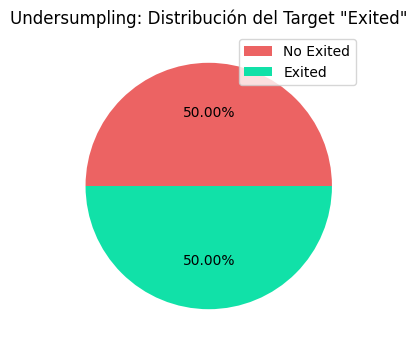

In [9]:
colores = ['#ec6363', '#11e1a8']
plt.figure(figsize=(4,4))
plt.pie(y_train_resampled.value_counts(),
        autopct='%1.2f%%',
        colors=colores)
plt.title('Undersumpling: Distribución del Target "Exited"')
plt.legend(['No Exited', 'Exited'], loc='upper right');

exited_situacion = pd.DataFrame(y_train_resampled.value_counts())
exited_situacion

# 5. Modelos de Machine Learning

1 - Modelos a emplear: 
1. Logistic Regression
2. Random Forest Classifier
3. GradientBoostingClassifier
4. KNeighborsClassifier (KNN)
5. Support Vector Machines (SVM): SVC

2 - Nos centraremos en el scoring de "recall": 
Mide la proporción de instancias positivas correctamente clasificadas entre todas las instancias que realmente son positivas. En este caso, el costo de los falsos negativos es alto y queremos identificar la mayor cantidad posible de casos positivos.


## 5.1. Logistic Regression

In [10]:
reg_log = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    'selectkbest__k': np.arange(1, 10), 
    'reglog__C': [0.1, 1, 10]             
}

gs_reg_log = GridSearchCV(reg_log, reg_log_param, cv=10, scoring='recall', verbose=3, n_jobs=-1)

gs_reg_log.fit(X_train_resampled, y_train_resampled)

print("Mejor puntuación de recall:", gs_reg_log.best_score_)
print("Mejores parámetros:", gs_reg_log.best_params_)
print("Mejor estimador (pipeline):", gs_reg_log.best_estimator_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


Mejor puntuación de recall: 0.757709572438559
Mejores parámetros: {'reglog__C': 0.1, 'selectkbest__k': 3}
Mejor estimador (pipeline): Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=3)),
                ('reglog', LogisticRegression(C=0.1))])


In [11]:
final_model_reg_log = gs_reg_log.best_estimator_
final_model_reg_log.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_reg_log.predict(X_test)

In [12]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.68875
precision_score 0.353968253968254
recall_score 0.7101910828025477
roc_auc_score 0.6968529286485522
confusion_matrix
 [[879 407]
 [ 91 223]]


In [13]:
selectkbest = final_model_reg_log.named_steps['selectkbest']

# Obtener las características seleccionadas
features_selected = X_train_resampled.columns[selectkbest.get_support()]

# Imprimir las características seleccionadas
print("Características seleccionadas por SelectKBest:", features_selected)

Características seleccionadas por SelectKBest: Index(['NumOfProducts', 'IsActiveMember', 'Age Category'], dtype='object')


## 5.2. Random Forest Classifier

In [14]:
rnf_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])

rnf_param = {
    "selectkbest__k": np.arange(1, 10),
    "classifier__n_estimators": [10, 100, 1000],
    'classifier__max_depth': [3, 5, 7],
    "classifier__max_features": [1, 2, 3]
}

gs_rnf = GridSearchCV(rnf_pipe,
                      rnf_param,
                      cv=10,
                      scoring='recall',
                      verbose=1,
                      n_jobs=-1)

gs_rnf.fit(X_train_resampled, y_train_resampled)

print("Mejor puntuación de recall:", gs_rnf.best_score_)
print("Mejores parámetros:", gs_rnf.best_params_)
print("Mejor estimador (pipeline):", gs_rnf.best_estimator_)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


Mejor puntuación de recall: 0.7397037369543262
Mejores parámetros: {'classifier__max_depth': 5, 'classifier__max_features': 1, 'classifier__n_estimators': 100, 'selectkbest__k': 3}
Mejor estimador (pipeline): Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=3)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_features=1))])


In [15]:
final_model_rnf = gs_rnf.best_estimator_
final_model_rnf.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_rnf.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.715
precision_score 0.37630662020905925
recall_score 0.6878980891719745
roc_auc_score 0.7047577537617259
confusion_matrix
 [[928 358]
 [ 98 216]]


In [16]:
selectkbest = final_model_rnf.named_steps['selectkbest']

features_selected = X_train_resampled.columns[selectkbest.get_support()]

print("Características seleccionadas por SelectKBest:", features_selected)

Características seleccionadas por SelectKBest: Index(['NumOfProducts', 'IsActiveMember', 'Age Category'], dtype='object')


## 5.5. SVC

In [17]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", SVC())
])

svm_params = {
    'selectkbest__k':np.arange(5,10),
    'classifier': [SVC()],
    'classifier__C': [0.1,1,10]
}
gs_svc = GridSearchCV(rnf_pipe,
                         svm_params,
                         cv = 4,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_svc.fit(X_train_resampled, y_train_resampled)

print("Mejor puntuación de recall:", gs_svc.best_score_)
print("Mejores parámetros:", gs_svc.best_params_)
print("Mejor estimador (pipeline):", gs_svc.best_estimator_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


Mejor puntuación de recall: 0.6811804319289348
Mejores parámetros: {'classifier': SVC(), 'classifier__C': 0.1, 'selectkbest__k': 9}
Mejor estimador (pipeline): Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=9)),
                ('classifier', SVC(C=0.1))])


In [20]:
final_model_svc = gs_svc.best_estimator_
final_model_svc.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_svc.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.74875
precision_score 0.4123505976095618
recall_score 0.6592356687898089
roc_auc_score 0.7149211003358065
confusion_matrix
 [[991 295]
 [107 207]]


In [21]:
selectkbest = final_model_svc.named_steps['selectkbest']

features_selected = X_train_resampled.columns[selectkbest.get_support()]

print("Características seleccionadas por SelectKBest:", features_selected)

Características seleccionadas por SelectKBest: Index(['Geography', 'Gender', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'EstimatedSalary', 'Card Type', 'Age Category', 'CreditScore Category'],
      dtype='object')


# 6. Pipeline

In [22]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest(k=10)),
    ("classifier", RandomForestClassifier())
])

log_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(5, 13),
    'classifier': [LogisticRegression()],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

rf_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(5, 13),
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__n_estimators': [50, 100, 200, 500]
}

gb_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(5, 13),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__n_estimators': [50, 100, 200, 500]
}

knn_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(5, 13),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.arange(5, 20)
}

svm_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(5, 13),
    'classifier': [SVC()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['poly'],
}

search_space = [log_params, rf_params, gb_params, knn_params, svm_params]

scoring = {'f1_weighted': 'f1_weighted', 'precision_weighted': 'precision_weighted', 'recall_weighted': 'recall_weighted'}

clf_gs = GridSearchCV(estimator=pipe, param_grid=search_space, cv=5, scoring=scoring, refit='recall_weighted', verbose=3, n_jobs=-1)
clf_gs.fit(X_train_resampled, y_train_resampled)

print("Mejor clasificador:", clf_gs.best_estimator_)
print("Mejor puntuación de recall:", clf_gs.best_score_)
print("Mejores parámetros:", clf_gs.best_params_)

Fitting 5 folds for each of 912 candidates, totalling 4560 fits
Mejor clasificador: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=500))])
Mejor puntuación de recall: 0.748689841263149
Mejores parámetros: {'classifier': RandomForestClassifier(), 'classifier__max_depth': 7, 'classifier__n_estimators': 500, 'scaler': None, 'selectkbest__k': 9}


In [106]:
final_model_gs = clf_gs.best_estimator_
final_model_gs.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_gs.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.77125
Precision Score: 0.8059301798606515
Recall Score: 0.77125
F1 Score: 0.7841595918367347
ROC AUC Score: 0.7108646769224672
Confusion Matrix:
 [[1042  244]
 [ 122  192]]


In [91]:
best_selectkbest = clf_gs.best_estimator_.named_steps['selectkbest']

selected_features = X_train_resampled.columns[best_selectkbest.get_support()]

print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Geography', 'Gender', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'EstimatedSalary', 'Card Type', 'Age Category', 'CreditScore Category'],
      dtype='object')


In [92]:
best_classifier = clf_gs.best_estimator_.named_steps['classifier']
feature_importances = best_classifier.feature_importances_
feature_importances

array([0.06834336, 0.03452562, 0.10626448, 0.1644825 , 0.11832907,
       0.07934329, 0.02963067, 0.37363169, 0.02544932])

In [96]:
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
7,Age Category,0.373632
3,NumOfProducts,0.164482
4,IsActiveMember,0.118329
2,Balance,0.106264
5,EstimatedSalary,0.079343
0,Geography,0.068343
1,Gender,0.034526
6,Card Type,0.029631
8,CreditScore Category,0.025449


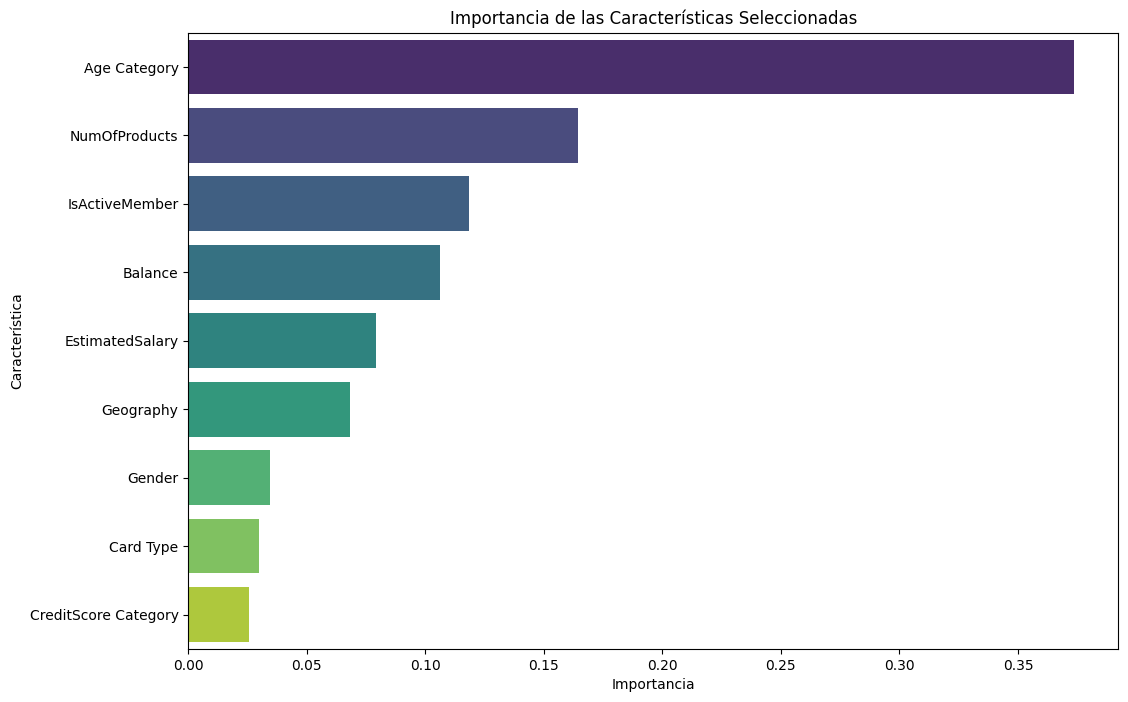

In [107]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Características Seleccionadas')
plt.xlabel('Importancia')
plt.ylabel('Característica');

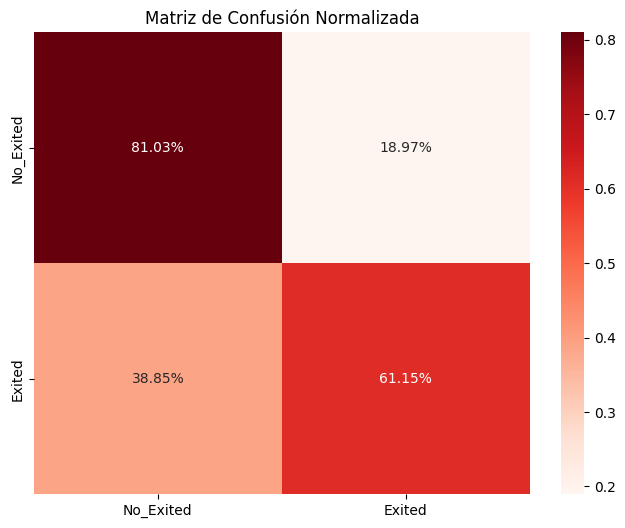

In [108]:
conf_matrix_test = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión Normalizada');

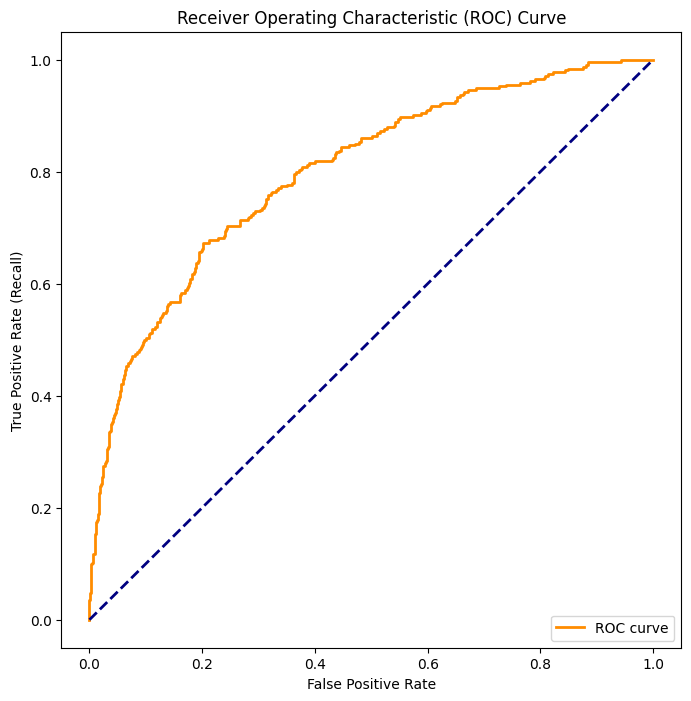

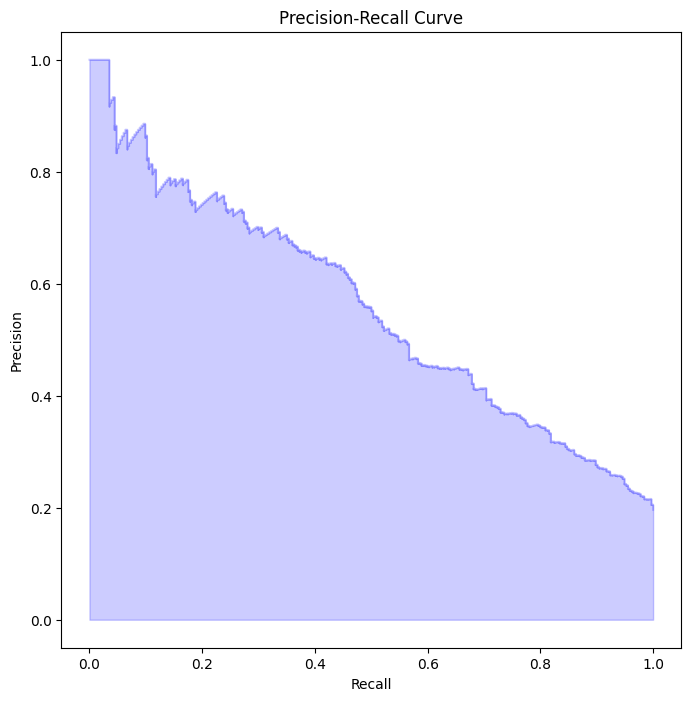

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve

y_pred = clf_gs.predict(X_test)
y_proba = clf_gs.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 7. Evualuación en Test

In [48]:
df_test = pd.read_csv("../data_processed/Test_Churn_processed.csv")
df_test.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
0,2,0,8,102603.30,0,1,1,180693.61,3,1,751,2,3,0
1,1,0,9,0.00,0,1,0,126475.79,2,2,947,1,3,0
2,1,0,1,0.00,0,0,0,133535.99,2,1,930,2,2,0
3,1,0,6,105000.85,0,1,1,87412.24,3,0,281,3,2,1
4,0,0,5,0.00,0,1,1,164886.64,4,0,537,2,2,0


In [49]:
X_t = df_test.drop(columns=["Exited"])
y_t = df_test["Exited"]

In [50]:
y_pred_test = final_model_gs.predict(X_t)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
X_t.shape

(2000, 13)

In [52]:
y_t.shape

(2000,)

In [103]:
print("Accuracy Score:", accuracy_score(y_t, y_pred_test))
print("Precision Score:", precision_score(y_t, y_pred_test, average='weighted'))
print("Recall Score:", recall_score(y_t, y_pred_test, average='weighted'))
print("F1 Score:", f1_score(y_t, y_pred_test, average='weighted'))
print("ROC AUC Score:", roc_auc_score(y_t, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_t, y_pred_test))

Accuracy Score: 0.758
Precision Score: 0.8124760773035856
Recall Score: 0.758
F1 Score: 0.7759892623716154
ROC AUC Score: 0.7247213961110697
Confusion Matrix:
 [[1254  355]
 [ 129  262]]


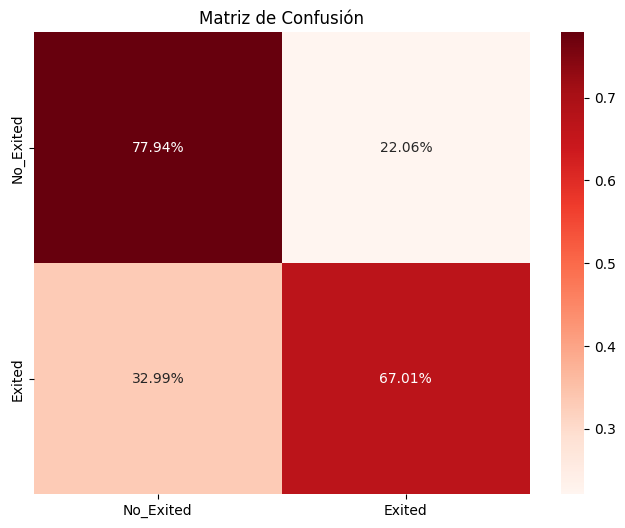

In [104]:
conf_matrix_test = confusion_matrix(y_t, y_pred_test, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión');

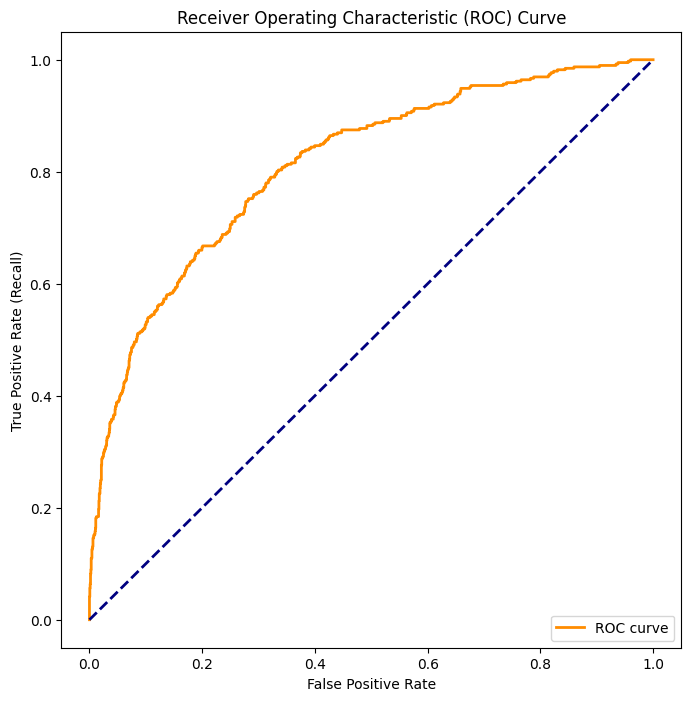

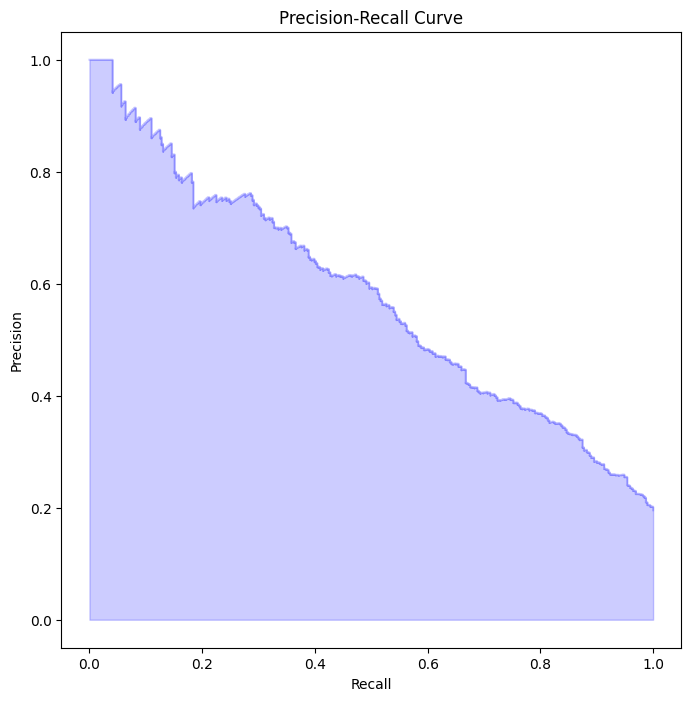

In [109]:
from sklearn.metrics import roc_curve, precision_recall_curve

y_pred = clf_gs.predict(X_t)
y_proba = clf_gs.predict_proba(X_t)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_t, y_proba)
precision, recall, _ = precision_recall_curve(y_t, y_proba)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Guardamos el modelo:

In [56]:
filename = '../models/finished_model_gs'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model_gs, archivo_salida)

In [57]:
model_info = {'classifier': RandomForestClassifier(), 'classifier__max_depth': 7, 'classifier__n_estimators': 500, 'scaler': None, 'selectkbest__k': 8}

with open('../models/final_model_gs.yaml', 'w') as yaml_file:
    yaml.dump(model_info, yaml_file)

In [58]:
with open(filename, 'rb') as archivo_entrada:
    modelo_importado_1 = pickle.load(archivo_entrada)

In [59]:
modelo_importado_1

Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=500))])

In [60]:
modelo_importado_1.predict(X_t)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Prueba de nuevos valores:

In [61]:
np.random.seed(11)

nuevos_valores = {
    'Geography': np.random.randint(0, 3, size=5),  
    'Gender': np.random.randint(0, 2, size=5),    
    'Tenure': np.random.randint(1, 10, size=5),     
    'Balance': np.random.uniform(0, 150000, size=5), 
    'NumOfProducts': np.random.randint(0, 5, size=5),  
    'HasCrCard': np.random.randint(0, 2, size=5),   
    'IsActiveMember': np.random.randint(0, 2, size=5), 
    'EstimatedSalary': np.random.uniform(0, 200000, size=5),  
    'Satisfaction Score': np.random.randint(1, 5, size=5), 
    'Card Type': np.random.randint(1, 5, size=5),    
    'Point Earned': np.random.randint(200, 1000, size=5),  
    'Age Category': np.random.randint(1, 4, size=5), 
    'CreditScore Category': np.random.randint(1, 4, size=5)  
}

nuevos_df = pd.DataFrame(nuevos_valores)
nuevos_df



,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category
0,1,1,1,134085.625543,3,1,0,16790.628664,4,4,331,3,3
1,0,1,1,128573.137061,3,1,1,142545.187138,1,3,927,1,3
2,1,0,5,24762.992639,2,0,1,119908.679252,4,4,665,3,2
3,1,0,3,94850.102074,2,1,0,11134.735917,2,4,780,2,3
4,0,1,2,3072.541919,0,1,1,95959.456332,2,2,528,2,2


In [62]:
modelo_importado_1.predict(nuevos_df)

array([1, 1, 1, 1, 0], dtype=int64)

# 8. No Supervisado

In [63]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("classifier", RandomForestClassifier())
])

log_params = {
    'scaler': [StandardScaler(), None],
    'classifier': [LogisticRegression()],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

rf_params = {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [None, 5, 10],
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__n_estimators': [50, 100, 200, 500]
}

gb_params = {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [None, 5, 10],
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__n_estimators': [50, 100, 200, 500]
}

knn_params = {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [None, 5, 10],
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.arange(5, 20)
}

svm_params = {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [None, 5, 10],
    'classifier': [SVC()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['poly'],
}

search_space = [log_params, rf_params, gb_params, knn_params, svm_params]

scoring = {'f1_weighted': 'f1_weighted', 'precision_weighted': 'precision_weighted', 'recall_weighted': 'recall_weighted'}

clf_gs_pca = GridSearchCV(estimator=pipe, param_grid=search_space, cv=5, scoring=scoring, refit='recall_weighted', verbose=3, n_jobs=-1)
clf_gs_pca.fit(X_train_resampled, y_train_resampled)

print("Mejor clasificador:", clf_gs_pca.best_estimator_)
print("Mejor puntuación de recall:", clf_gs_pca.best_score_)
print("Mejores parámetros:", clf_gs_pca.best_params_)

Fitting 5 folds for each of 318 candidates, totalling 1590 fits
Mejor clasificador: Pipeline(steps=[('scaler', None), ('pca', PCA()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])
Mejor puntuación de recall: 0.7393124916555993
Mejores parámetros: {'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'pca__n_components': None, 'scaler': None}


In [64]:
final_model_gs_pca = clf_gs_pca.best_estimator_
final_model_gs_pca.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_gs_pca.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.760625
Precision Score: 0.807053808680248
Recall Score: 0.760625
F1 Score: 0.7767815734989648
ROC AUC Score: 0.715087022416816
Confusion Matrix:
 [[1016  270]
 [ 113  201]]


In [84]:
best_classifier = clf_gs_pca.best_estimator_.named_steps['classifier']

feature_importances = best_classifier.feature_importances_

feature_importances

variable_names = X_train_resampled.columns

importance_df = pd.DataFrame({'Variable': variable_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

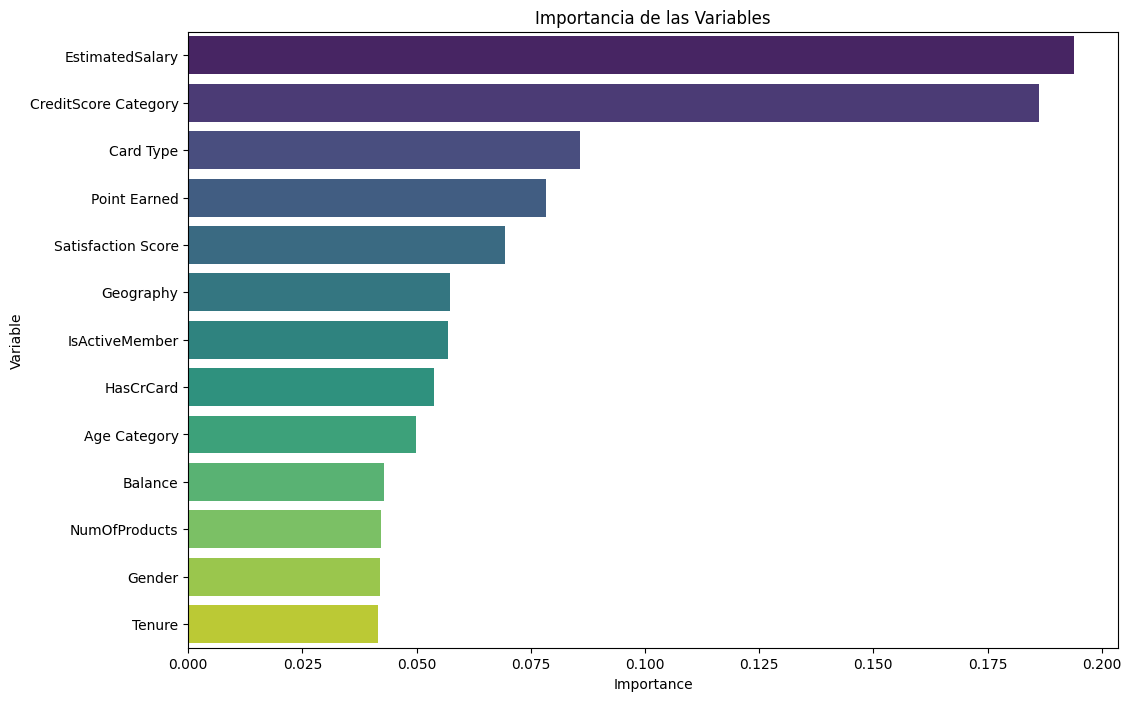

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=importance_df, palette='viridis')
plt.title('Importancia de las Variables')
plt.show()

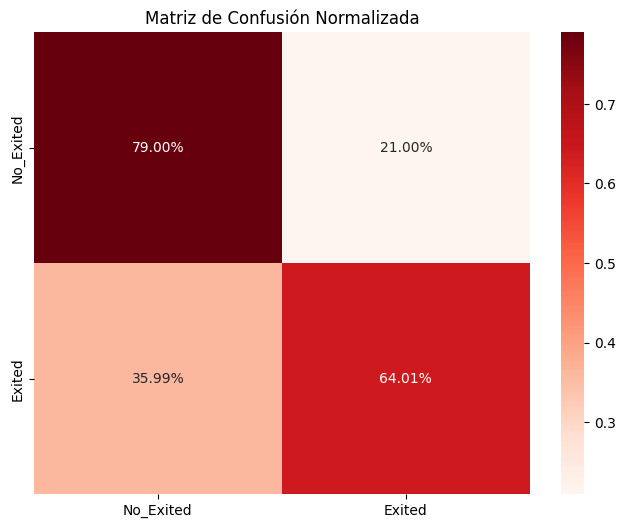

In [68]:
conf_matrix_test = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión Normalizada');

In [69]:
y_pred_test = final_model_gs_pca.predict(X_t)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [70]:
print("Accuracy Score:", accuracy_score(y_t, y_pred_test))
print("Precision Score:", precision_score(y_t, y_pred_test, average='weighted'))
print("Recall Score:", recall_score(y_t, y_pred_test, average='weighted'))
print("F1 Score:", f1_score(y_t, y_pred_test, average='weighted'))
print("ROC AUC Score:", roc_auc_score(y_t, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_t, y_pred_test))

Accuracy Score: 0.758
Precision Score: 0.8124760773035856
Recall Score: 0.758
F1 Score: 0.7759892623716154
ROC AUC Score: 0.7247213961110697
Confusion Matrix:
 [[1254  355]
 [ 129  262]]


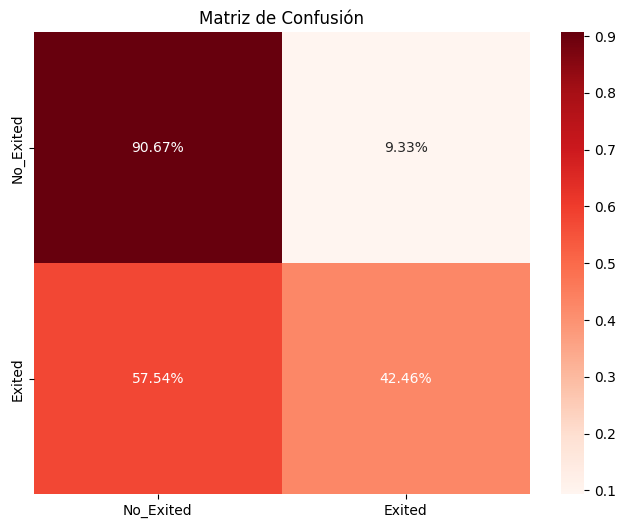

In [71]:
conf_matrix_test = confusion_matrix(y_pred_test, y_t, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión');

In [72]:
filename = '../models/finished_model_gs_pca'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model_gs, archivo_salida)

In [73]:
model_info = {'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'pca__n_components': None, 'scaler': None}

with open('../models/final_model_gs_pca.yaml', 'w') as yaml_file:
    yaml.dump(model_info, yaml_file)

In [74]:
with open(filename, 'rb') as archivo_entrada:
    modelo_importado_2 = pickle.load(archivo_entrada)

In [75]:
np.random.seed(12)

nuevos_valores = {
    'Geography': np.random.randint(0, 3, size=5), 
    'Gender': np.random.randint(0, 2, size=5),      
    'Tenure': np.random.randint(1, 10, size=5),   
    'Balance': np.random.uniform(0, 150000, size=5),  
    'NumOfProducts': np.random.randint(0, 5, size=5),  
    'HasCrCard': np.random.randint(0, 2, size=5),    
    'IsActiveMember': np.random.randint(0, 2, size=5),  
    'EstimatedSalary': np.random.uniform(0, 200000, size=5), 
    'Satisfaction Score': np.random.randint(1, 5, size=5),  
    'Card Type': np.random.randint(1, 5, size=5),   
    'Point Earned': np.random.randint(200, 1000, size=5),  
    'Age Category': np.random.randint(1, 4, size=5),  
    'CreditScore Category': np.random.randint(1, 4, size=5)  
}

nuevos_df = pd.DataFrame(nuevos_valores)
nuevos_df



,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category
0,2,0,3,147547.073972,0,0,0,99989.017056,1,2,893,1,2
1,1,0,7,72229.531615,2,1,0,40532.144630,1,4,403,1,3
2,1,1,1,136880.825090,2,1,0,125872.913434,2,2,509,3,1
3,2,0,6,28481.451632,0,1,0,28859.746058,4,4,819,3,3
4,0,1,9,22196.081525,4,1,1,10590.305481,1,1,375,3,3


In [76]:
modelo_importado_2.predict(nuevos_df)

array([0, 1, 1, 1, 1], dtype=int64)